In [39]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from collections import defaultdict
import gzip
import math

In [3]:
# Nombre del archivo de entrada
input_file = 'secondary-particles-gamma-compton.txt'  # Cambia 'archivo.txt' por el nombre de tu archivo de entrada

# Nombre del archivo de salida
output_file = 'energia-electrones-compton-dispersados.txt'

# Abrir el archivo de entrada en modo lectura y el de salida en modo escritura
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Dividir la línea por espacios y tomar la columna 10 (índice 9 en Python)
        columns = line.split()
        if len(columns) >= 10:  # Verifica que la línea tenga al menos 10 columnas
            energia = columns[9]  # Columna 10 es el índice 9
            outfile.write(energia + '\n')  # Escribir la energía en el archivo de salida

print("Columna 10 extraída y guardada en 'energia-electrones-compton-dispersados.txt'")


Columna 10 extraída y guardada en 'energia-electrones-compton-dispersados.txt'


In [5]:
# Nombre del archivo de entrada
input_file = 'secondary-particles-gamma-compton.txt'  # Cambia 'archivo.txt' por el nombre de tu archivo de entrada

# Nombre del archivo de salida
output_file = 'energia-gammas-compton-entrantes.txt'

# Abrir el archivo de entrada en modo lectura y el de salida en modo escritura
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Dividir la línea por espacios y tomar la columna 10 (índice 9 en Python)
        columns = line.split()
        if len(columns) >= 10:  # Verifica que la línea tenga al menos 10 columnas
            energia = columns[8]  # Columna 10 es el índice 9
            outfile.write(energia + '\n')  # Escribir la energía en el archivo de salida

print("Columna 10 extraída y guardada en 'energia-gammas-compton-entrantes.txt'")


Columna 10 extraída y guardada en 'energia-gammas-compton-entrantes.txt'


/tmp/ipykernel_54461/1015867350.py:41: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000)


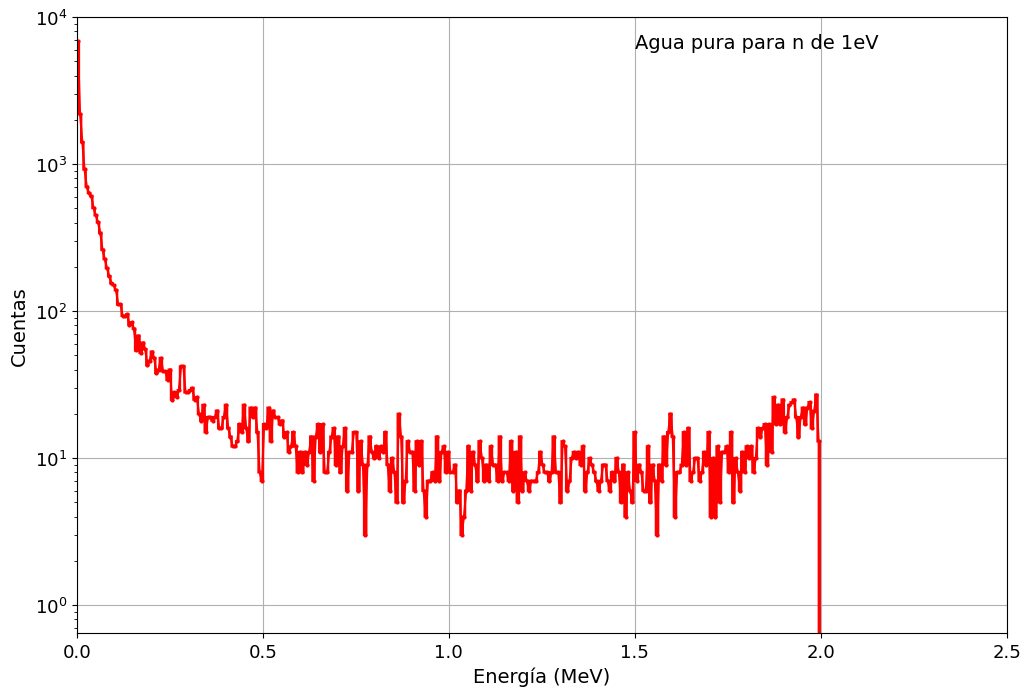

In [23]:
# Abrir el archivo para lectura
with open('energia-electrones-compton-dispersados.txt', 'r') as archivo:
    # Inicializar una lista para almacenar los datos modificados
    data = []
    
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_9 = float(columnas[0])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_9_modificado = valor_columna_9*1 
        #if valor_columna_7_modificado > 2:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_9_modificado)

num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
#counts, bins, _ = plt.hist(data, bins=600, histtype='step', color='blue', label='Total', linewidth=1.7, log=True)
counts, bins, _ = plt.hist(data, bins=800, histtype='step', color='red', linewidth=1.7, log=True)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
#plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='blue', label='2x$10^{5}$ N. a 10 MeV en agua pura')
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='red')
stats_text = f'Agua pura para n de 1eV'
#stats_text = f'Agua + 2.5 % de NaCl \nMean: \nRMS:'
plt.text(0.60, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=14)

# Configuraciones adicionales
plt.title('')
plt.xlim(0, 2.5)
plt.ylim(0, 10000)
#plt.xticks(np.arange(0, 2.2, 0.5))
# Aumentar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Energía (MeV)', fontsize=14)
plt.ylabel('Cuentas', fontsize=14)
plt.yscale('log')
plt.grid(True)
#plt.legend()
pdf_filename_stat_charge = 'e-compt-1eV-H2O-pura.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('e-compt-1eV-H2O-pura.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

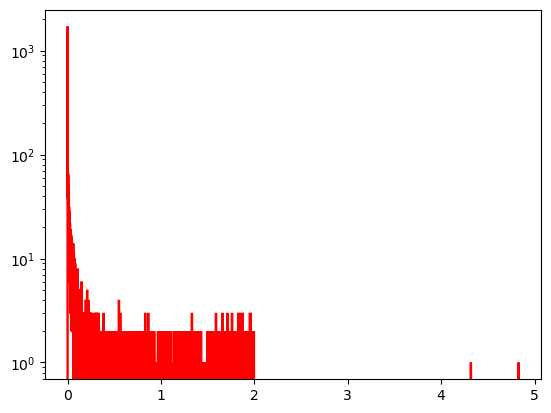

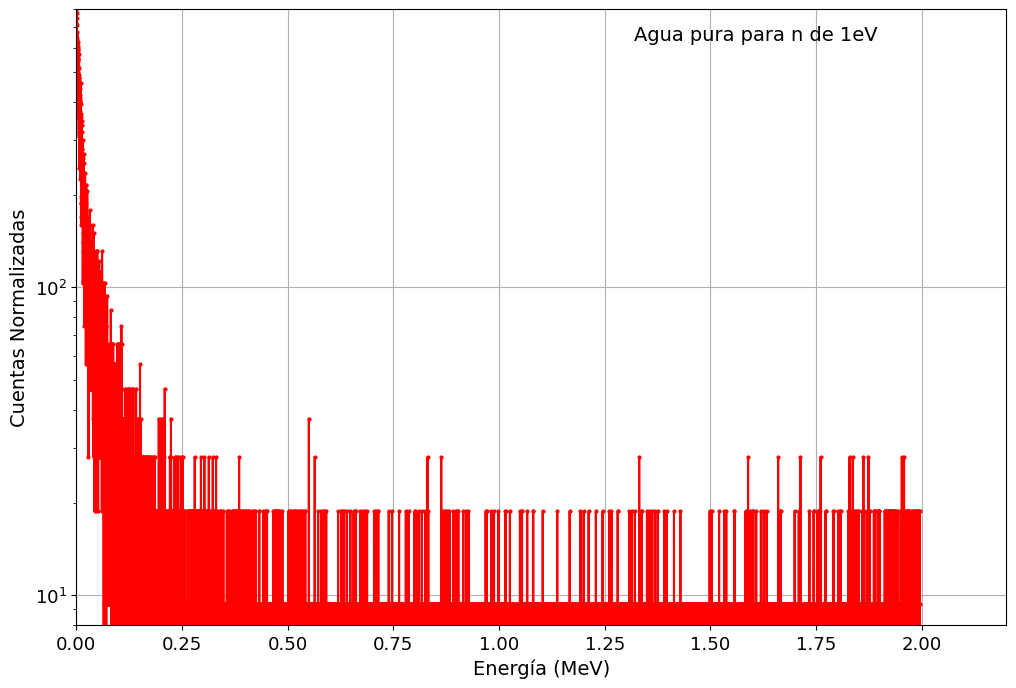

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Leer los datos del archivo y procesar la columna deseada
with open('energia-electrones-compton-dispersados.txt', 'r') as archivo:
    data = []
    for linea in archivo:
        columnas = linea.split()
        valor_columna_9 = float(columnas[0])
        data.append(valor_columna_9)

num_bins = int(math.sqrt(len(data)))

# Crear el histograma original
counts, bins, _ = plt.hist(data, bins=50000, histtype='step', color='red', linewidth=1.7, log=True)

# Normalización a 200,000 cuentas totales
target_total = 200000
current_total = sum(counts)
normalization_factor = target_total / current_total

# Aplicar el factor de normalización
counts_normalized = counts * normalization_factor

# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Graficar el histograma normalizado
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, counts_normalized, marker='.', linestyle='-', markersize=4, color='red')
stats_text = f'Agua pura para n de 1eV'
plt.text(0.60, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=14)

# Configuraciones adicionales
plt.xlim(0, 2.2)
plt.ylim(8, 800)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Energía (MeV)', fontsize=14)
plt.ylabel('Cuentas Normalizadas', fontsize=14)
plt.yscale('log')
plt.grid(True)

# Guardar el gráfico
plt.savefig('e-compt-500MeV-H2O-pura-normalized.pdf', format='pdf')
plt.savefig('e-compt-500MeV-H2O-pura-normalized.jpg', format='jpg')

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_54461/815461332.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000)


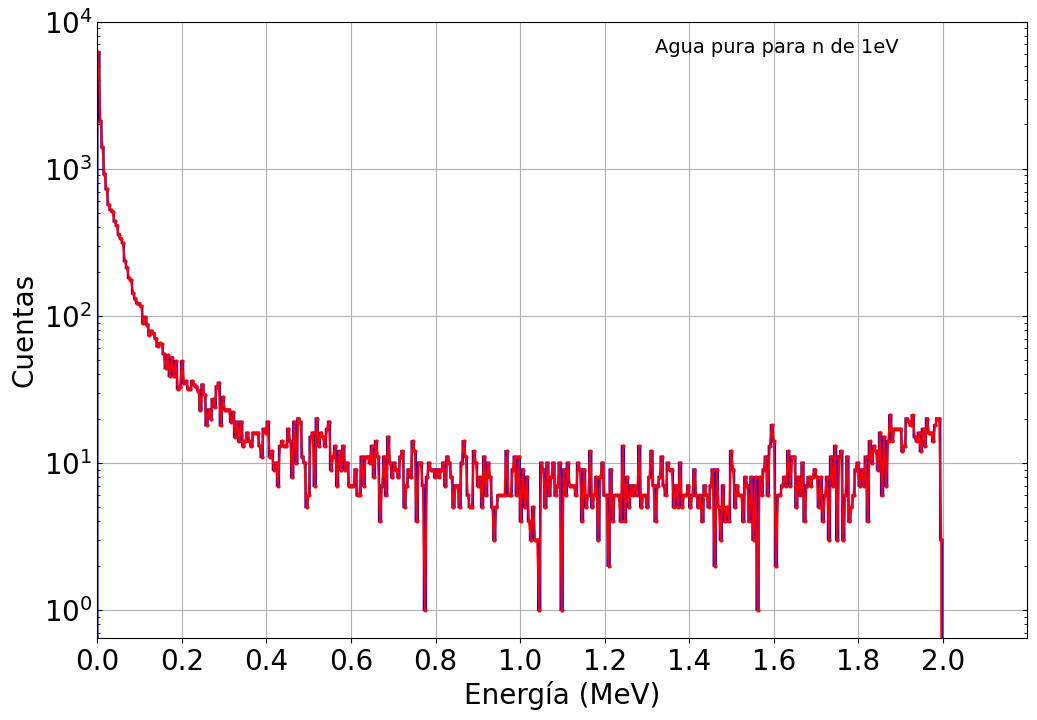

In [29]:
# Abrir el archivo para lectura
with open('energia-electrones-compton-dispersados.txt', 'r') as archivo:
    # Inicializar una lista para almacenar los datos modificados
    data = []
    
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_9 = float(columnas[0])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_9_modificado = valor_columna_9*1 
        #if valor_columna_7_modificado > 2:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_9_modificado)

num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
#counts, bins, _ = plt.hist(data, bins=600, histtype='step', color='blue', label='Total', linewidth=1.7, log=True)
counts, bins, _ = plt.hist(data, bins=1000, histtype='step', color='blue', linewidth=1.7, log=True)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
#plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='blue', label='2x$10^{5}$ N. a 10 MeV en agua pura')
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='red')
stats_text = f'Agua pura para n de 1eV'
#stats_text = f'Agua + 2.5 % de NaCl \nMean: \nRMS:'
#plt.text(0.50, 0.95, stats_text, transform=plt.gca().transAxes,bbox=dict(boxstyle='round', facecolor='red', alpha=0.5), fontsize=14)
plt.text(0.60, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=14)

# Mostrar los tics (marcas) a ambos lados del eje Y
plt.tick_params(axis='y', which='both', direction='in', labelsize=20, right=True)

# Configuraciones adicionales
plt.title('')
plt.xlim(0, 2.2)
plt.ylim(0, 10000)
plt.xticks(np.arange(0, 2.2, 0.2))
# Aumentar el tamaño de las etiquetas de los ejes
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20)  # Tics mayores
#plt.tick_params(axis='both', which='minor', labelsize=10)  # Tics menor
plt.xlabel('Energía (MeV)', fontsize=20)
plt.ylabel('Cuentas', fontsize=20)
plt.yscale('log')
plt.grid(True)
#plt.legend()
pdf_filename_stat_charge = 'Espectro-e-compt-1eV-H2O-Pura.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-e-compt-1eV-H2O-Pura.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

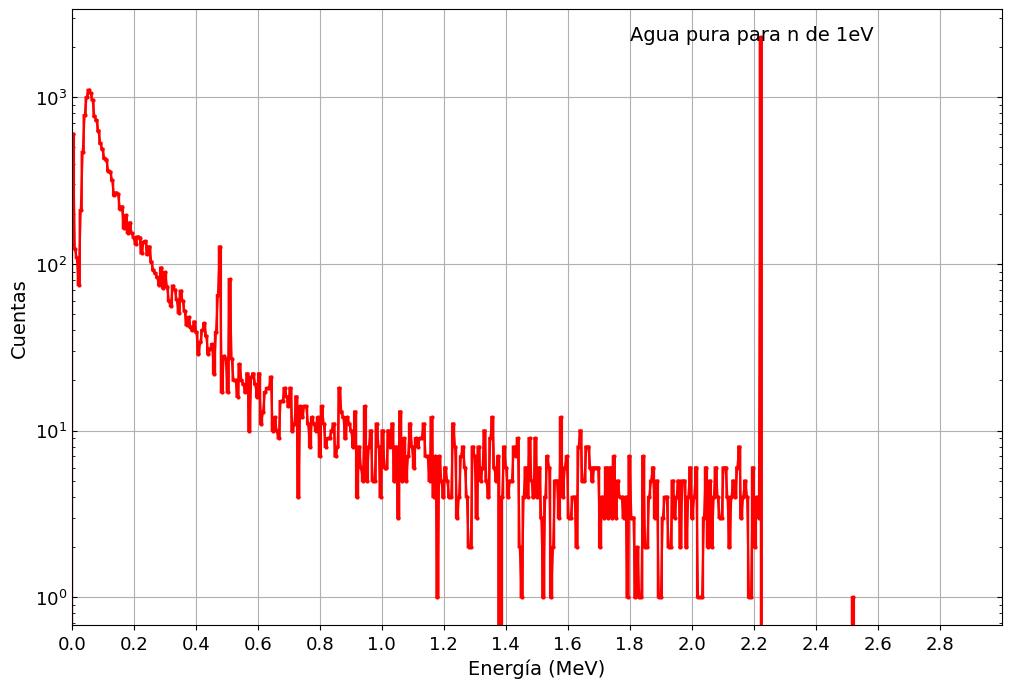

In [37]:
# Abrir el archivo para lectura
with open('energia-gammas-compton-entrantes.txt', 'r') as archivo:
    # Inicializar una lista para almacenar los datos modificados
    data = []
    
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_9 = float(columnas[0])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_9_modificado = valor_columna_9*1 
        #if valor_columna_7_modificado > 2:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_9_modificado)

num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
#counts, bins, _ = plt.hist(data, bins=600, histtype='step', color='blue', label='Total', linewidth=1.7, log=True)
counts, bins, _ = plt.hist(data, bins=1000, histtype='step', color='red', linewidth=1.7, log=True)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
#plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='blue', label='2x$10^{5}$ N. a 10 MeV en agua pura')
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='red')
stats_text = f'Agua pura para n de 1eV'
#stats_text = f'Agua + 2.5 % de NaCl \nMean: \nRMS:'
plt.text(0.60, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=14)
plt.tick_params(axis='y', which='both', direction='in', labelsize=15, right=True)
# Configuraciones adicionales
plt.title('')
plt.xlim(0, 3)
#plt.ylim(400, 60000)
plt.xticks(np.arange(0, 3, 0.2))
plt.tick_params(axis='x', which='both', labelsize=15)  # Tics mayores
# Aumentar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Energía (MeV)', fontsize=14)
plt.ylabel('Cuentas', fontsize=14)
plt.yscale('log')
plt.grid(True)
#plt.legend()
pdf_filename_stat_charge = 'energia-gammas-entrantes-1eV-H2O-Pura.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('energia-gammas-entrantes-1eV-H2O-Pura.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

In [41]:
## Abre el archivo de entrada en modo lectura
with open('gamma-compt-punto.txt', 'r') as infile:
    # Abre el archivo de salida en modo escritura
    with open('gamma-captura.txt', 'w') as outfile:
        # Lee el archivo línea por línea
        for line in infile:
            # Divide la línea en columnas separadas por espacios en blanco
            columns = line.split()
            # Verifica si la cuarta columna es '1'
            if columns[3] == '1' and columns[4] == 'compt':
                # Escribe la línea en el archivo de salida
                outfile.write(line)

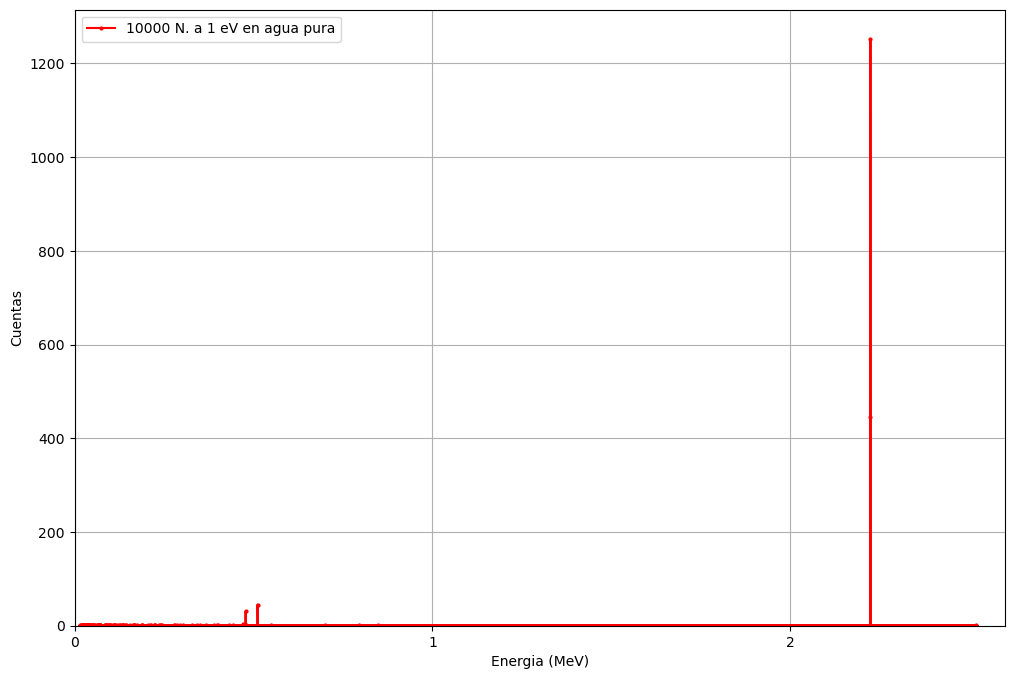

In [45]:
# Abrir el archivo para lectura
with open('gamma-captura.txt', 'r') as archivo:
    # Inicializar una lista para almacenar los datos modificados
    data = []
    
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_9 = float(columnas[8])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_9_modificado = valor_columna_9*1 
        #if valor_columna_7_modificado > 2:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_9_modificado)



# Imprimir la lista de datos
#print(data)

# Cargar datos desde el archivo
#data = np.loadtxt(file_path)
num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
counts, bins, _ = plt.hist(data, bins=50000, histtype='step', edgecolor='black', alpha=0.7)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='red', label='10000 N. a 1 eV en agua pura')


# Configuraciones adicionales
plt.title('')
plt.xlim(0, 2.6)
#plt.ylim(0, 60000)
plt.xticks(np.arange(0, 2.6, 1))
plt.xlabel('Energia (MeV)')
plt.ylabel('Cuentas')
#plt.yscale('log')
plt.grid(True)
plt.legend()
pdf_filename_stat_charge = 'Espectro-lineal-gamma-tanque-AP.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-lineal-gamma-tanque-AP.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

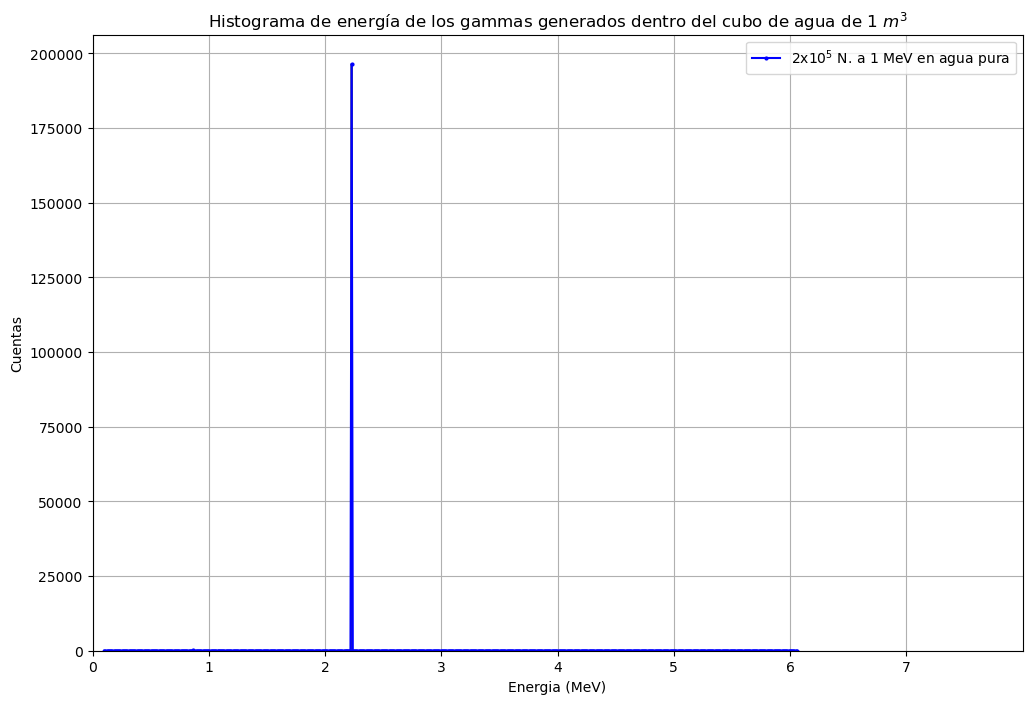

In [2]:
# Lista para almacenar los valores de la columna 7
#data = []

# Abrir el archivo para lectura
#with open('rastreo-gamma.txt', 'r') as archivo:
    # Leer cada línea del archivo
#    for linea in archivo:
        # Dividir la línea en columnas
#        columnas = linea.split()
        # Obtener el valor de la columna 7 y convertirlo a flotante
#        valor_columna_7 = float(columnas[6])
        #if valor_columna_7 > 0.05:
           # Agregar el valor a la lista
#           data.append(valor_columna_7)

# Abrir el archivo para lectura
with open('gamma-captura-1MeV.txt', 'r') as archivo:
    # Inicializar una lista para almacenar los datos modificados
    data = []
    
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_9 = float(columnas[8])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_9_modificado = valor_columna_9*1 
        #if valor_columna_7_modificado > 2:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_9_modificado)



# Imprimir la lista de datos
#print(data)

# Cargar datos desde el archivo
#data = np.loadtxt(file_path)
num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
counts, bins, _ = plt.hist(data, bins=600, histtype='step', edgecolor='black', alpha=0.7)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='blue', label='2x$10^{5}$ N. a 1 MeV en agua pura')


# Configuraciones adicionales
plt.title('Histograma de energía de los gammas generados dentro del cubo de agua de 1 $m^{3}$')
plt.xlim(0, 8)
#plt.ylim(0, 60000)
plt.xticks(np.arange(0, 8, 1))
plt.xlabel('Energia (MeV)')
plt.ylabel('Cuentas')
#plt.yscale('log')
plt.grid(True)
plt.legend()
pdf_filename_stat_charge = 'Espectro-gamma-compt.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-gamma-compt.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

2174


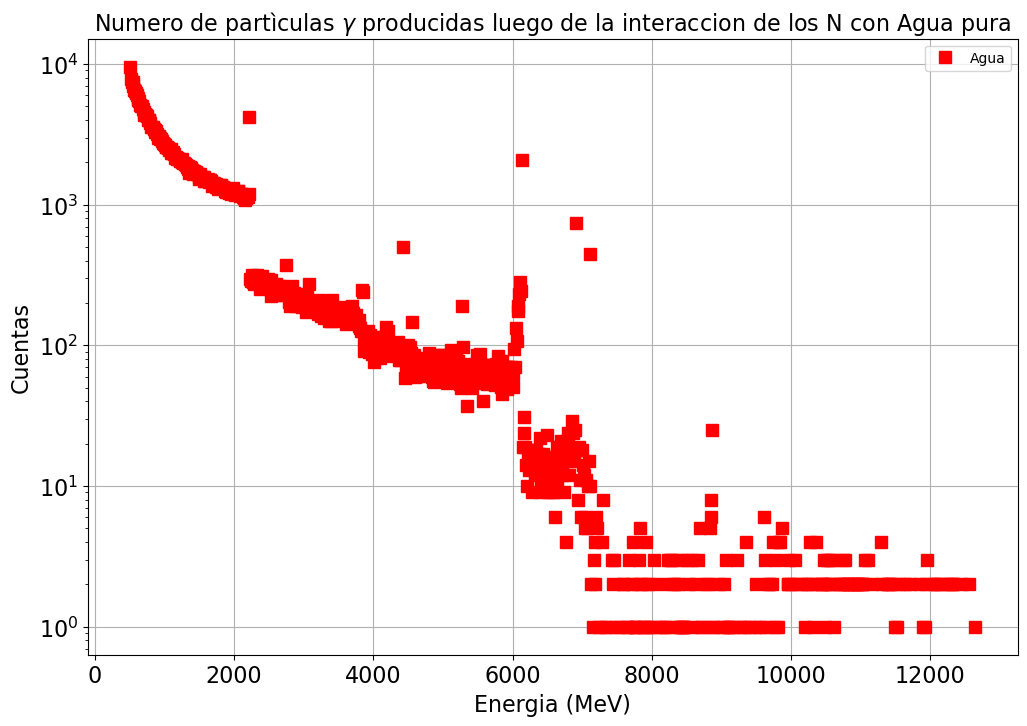

In [50]:
# Lista para almacenar los valores de la columna 7
data = []

# Abrir el archivo para lectura
with open('rastreo-gamma.txt', 'r') as archivo:
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_7 = float(columnas[6])
        # Agregar el valor a la lista
        #data.append(valor_columna_7)
        #if valor_columna_7 > 0:
        data.append(valor_columna_7)
# Imprimir la lista de datos
#print(data)

# Cargar datos desde el archivo
#data = np.loadtxt(file_path)
num_bins = int(math.sqrt(len(data)))
print(num_bins);
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
#counts, bins, _ = plt.hist(data, bins=370, histtype='step', edgecolor='black', alpha=0.7)
#counts, bins, _ = plt.hist(data, bins=400, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
plt.plot(bin_centers, counts, marker='s', linestyle='None', markersize=8, color='red', label='Agua')

# Configuraciones adicionales
plt.title('Numero de partìculas $\gamma$ producidas luego de la interaccion de los N con Agua pura',fontsize=16)
#plt.xlim(0, 10)
#plt.ylim(1000, 10000000)
#plt.xticks(np.arange(0, 10, 1))
plt.xlabel('Energia (MeV)',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Cuentas',fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.grid(True)
plt.legend()
pdf_filename_stat_charge = 'Espectro-gamma-hasta-10.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-gamma-hasta-10.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

3553


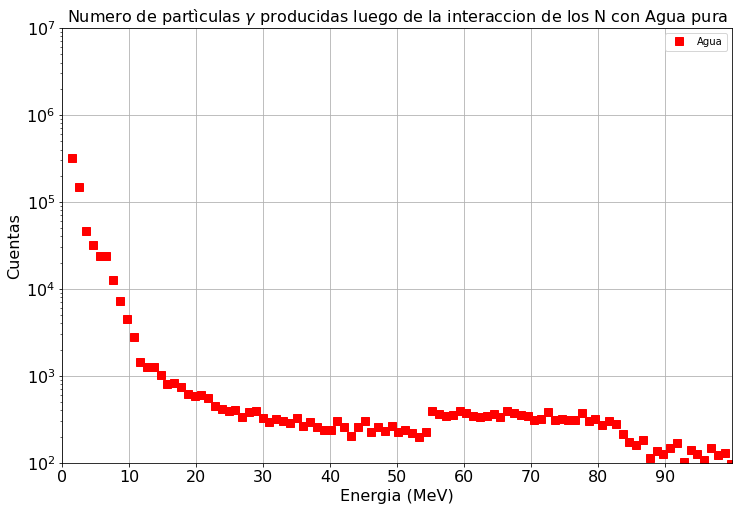

In [44]:
# Lista para almacenar los valores de la columna 7
data = []

# Abrir el archivo para lectura
with open('gamma-1.txt', 'r') as archivo:
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_7 = float(columnas[6])
        # Agregar el valor a la lista
        #data.append(valor_columna_7)
        if valor_columna_7 > 0:
          data.append(valor_columna_7)
# Imprimir la lista de datos
#print(data)

# Cargar datos desde el archivo
#data = np.loadtxt(file_path)
num_bins = int(math.sqrt(len(data)))
print(num_bins);
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
#counts, bins, _ = plt.hist(data, bins=370, histtype='step', edgecolor='black', alpha=0.7)
#counts, bins, _ = plt.hist(data, bins=400, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
plt.plot(bin_centers, counts, marker='s', linestyle='None', markersize=8, color='red', label='Agua')

# Configuraciones adicionales
plt.title('Numero de partìculas $\gamma$ producidas luego de la interaccion de los N con Agua pura',fontsize=16)
plt.xlim(0, 100)
plt.ylim(100, 10000000)
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Energia (MeV)',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Cuentas',fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.grid(True)
plt.legend()
pdf_filename_stat_charge = 'Espectro-gamma-completo.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-gamma-completo.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

In [51]:
# Abrir el archivo de entrada para lectura y el archivo de salida para escritura
with open('rastreo-gamma.txt', 'r') as entrada, open('gamma-compt.txt', 'w') as salida:
    # Leer cada línea del archivo de entrada
    for linea in entrada:
        # Dividir la línea en columnas
        columnas = linea.split()
        # Verificar si la tercera columna contiene la palabra "compt"
        if 'compt' in columnas[2]:
            # Escribir la línea en el archivo de salida
            salida.write(linea)


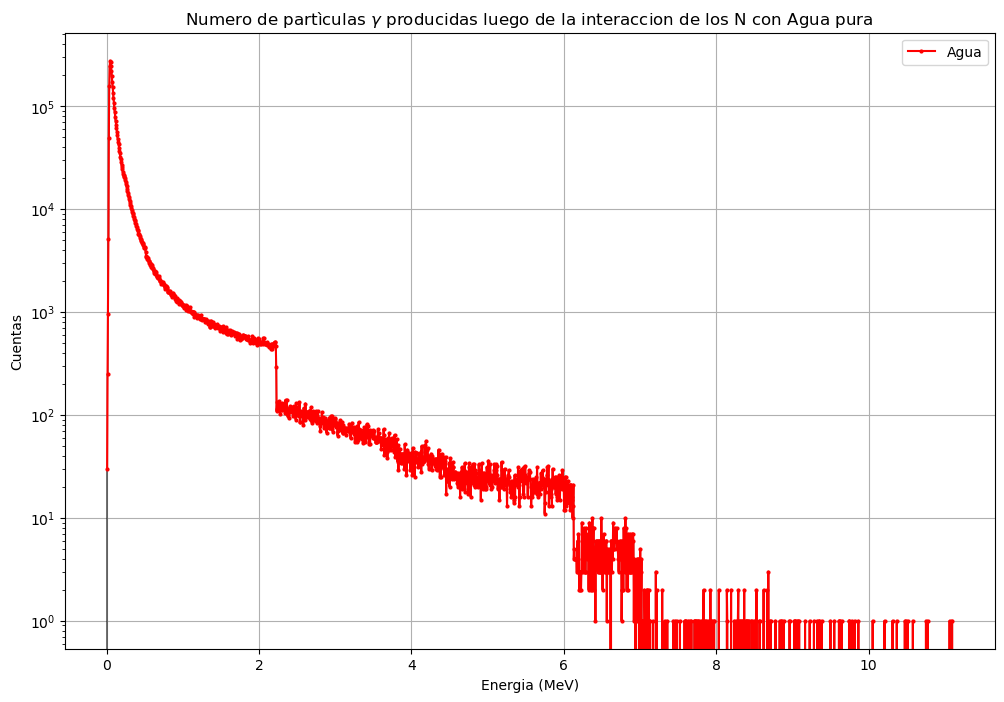

In [58]:
data = []
    # Abrir el archivo para lectura
with open('gamma-compt.txt', 'r') as archivo:
    # Leer cada línea del archivo
    for linea in archivo:
        # Dividir la línea en columnas
        columnas = linea.split()
        
        # Obtener el valor de la columna 7 y convertirlo a flotante
        valor_columna_7 = float(columnas[6])
        
        # Multiplicar el valor de la columna 7 por 1000
        valor_columna_7_modificado = valor_columna_7 * 1
        #if valor_columna_7_modificado > 0:
           # Agregar el valor modificado a la lista
        data.append(valor_columna_7_modificado)



# Imprimir la lista de datos
#print(data)

# Cargar datos desde el archivo
#data = np.loadtxt(file_path)
num_bins = int(math.sqrt(len(data)))
# Graficar el histograma con marcadores triangulares
plt.figure(figsize=(12, 8))

# Crear histograma
counts, bins, _ = plt.hist(data, bins=2000, histtype='step', edgecolor='black', alpha=0.7)
#counts, bins, _ = plt.hist(data, bins=num_bins, histtype='step', edgecolor='black', alpha=0.7)
# Puntos en el centro de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Configurar el marcador a triángulo
plt.plot(bin_centers, counts, marker='.', linestyle='-', markersize=4, color='red', label='Agua')

# Configuraciones adicionales
plt.title('Numero de partìculas $\gamma$ producidas luego de la interaccion de los N con Agua pura')
#plt.xlim(0, 10)
#plt.ylim(0, 60000)
#plt.xticks(np.arange(0, 10, 0.5))
plt.xlabel('Energia (MeV)')
plt.ylabel('Cuentas')
plt.yscale('log')
plt.grid(True)
plt.legend()
pdf_filename_stat_charge = 'Espectro-gamma-compt.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Espectro-gamma-compt.jpg', format='jpg')
# Mostrar el gráfico
plt.show()